<a href="https://colab.research.google.com/github/samsomsabu/CIA_ASSIGNMENT/blob/main/DAA_CIA_ASSIGNMENT_2348549.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

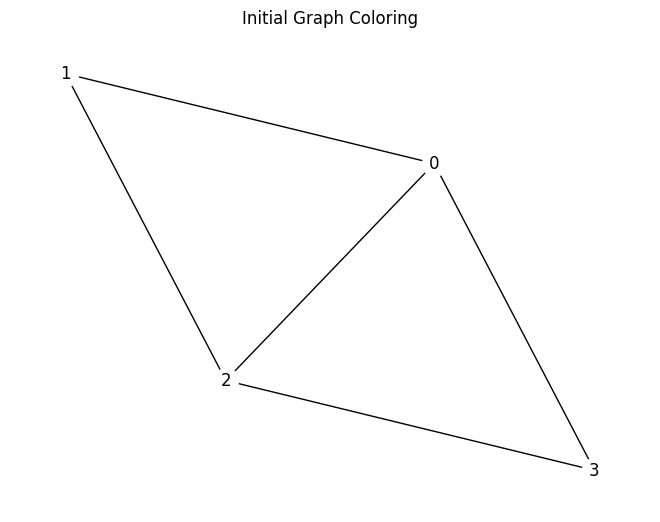

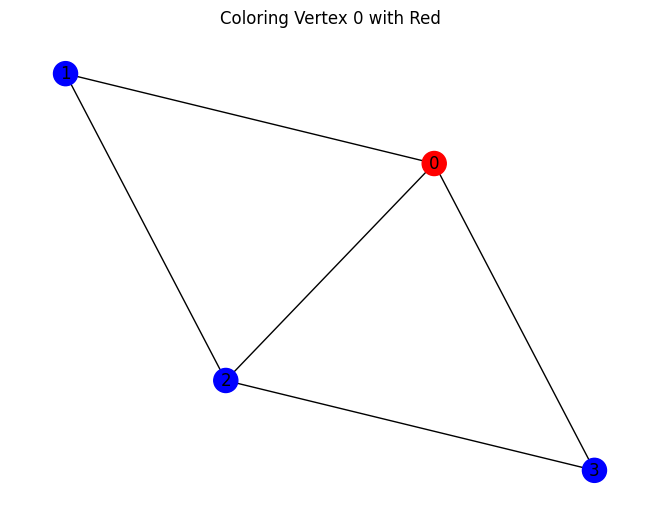

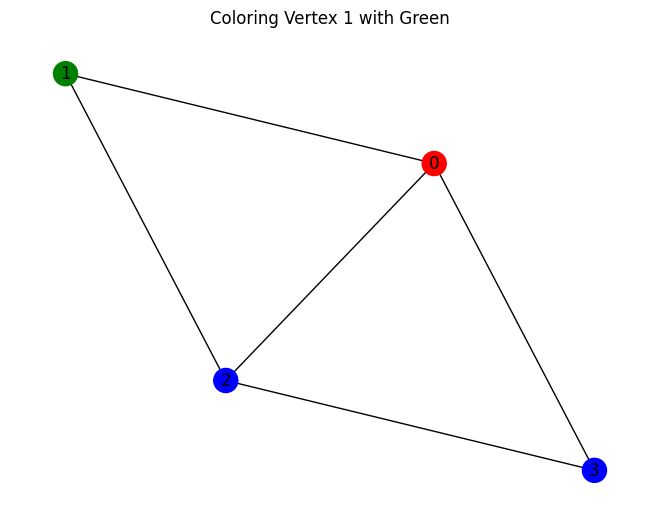

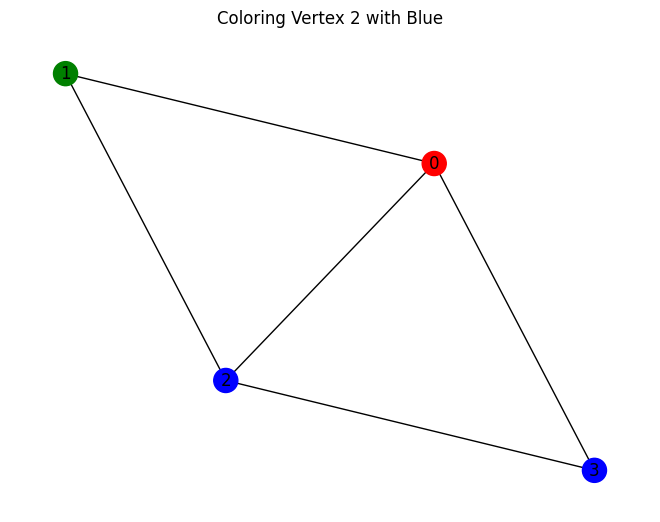

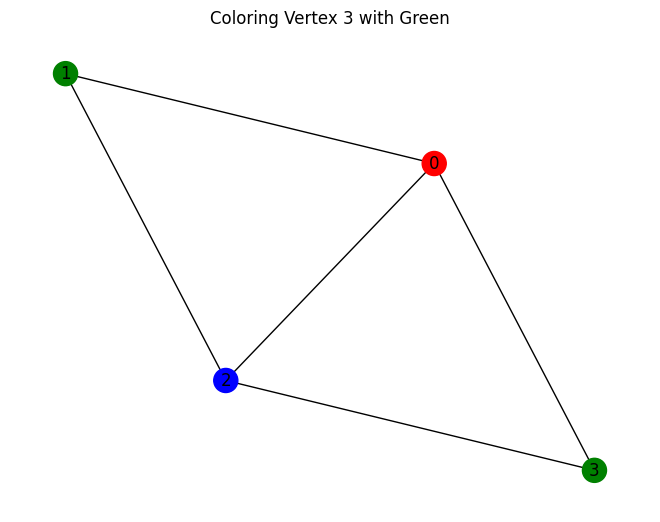

Color schema for vertices:
Red
Green
Blue
Green
Minimum number of colors required:  3


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphColoring:
    def __init__(self):
        """
        Constructor to initialize the GraphColoring class with the number of vertices, colors, and color names.
        """
        self.num_vertices = 4
        self.colors = None
        self.color_names = ["Red", "Green", "Blue"]

    def is_safe(self, vertex, graph_matrix, color, current_color):
        """
        Checks if it is safe to color the current vertex with the given color.
        Returns True if safe, False otherwise.
        """
        for i in range(self.num_vertices):
            if graph_matrix[vertex][i] == 1 and current_color == color[i]:
                return False
        return True

    def graph_color_util(self, graph_matrix, num_colors, color, vertex, nx_graph, pos):
        """
        Recursive utility function to perform backtracking for graph coloring.
        """
        if vertex == self.num_vertices:
            return True

        for i in range(num_colors):
            if self.is_safe(vertex, graph_matrix, color, i):
                color[vertex] = i
                self.visualize_backtracking(nx_graph, pos, color, f'Coloring Vertex {vertex} with {self.color_names[i]}')
                if self.graph_color_util(graph_matrix, num_colors, color, vertex + 1, nx_graph, pos):
                    return True
                color[vertex] = -1

        return False

    def print_coloring_solution(self, color):
        """
        Prints the final color schema for each vertex.
        """
        print("Color schema for vertices:")
        for i in range(self.num_vertices):
            print(self.color_names[color[i]])

    def graph_coloring(self, graph_matrix, num_colors):
        """
        Main function for graph coloring. Initiates the graph coloring process and displays the result.
        """
        self.colors = [-1] * self.num_vertices

        nx_graph = nx.Graph()
        for i in range(self.num_vertices):
            nx_graph.add_node(i)
            for j in range(i + 1, self.num_vertices):
                if graph_matrix[i][j] == 1:
                    nx_graph.add_edge(i, j)

        pos = nx.spring_layout(nx_graph)
        nx.draw(nx_graph, pos, with_labels=True, node_color='white', edge_color='black')
        plt.title('Initial Graph Coloring')
        plt.show()

        if not self.graph_color_util(graph_matrix, num_colors, self.colors, 0, nx_graph, pos):
            print("Color schema not possible")
            return False

        self.print_coloring_solution(self.colors)
        return True

    def visualize_backtracking(self, nx_graph, pos, color, title):
        """
        Visualizes the graph at each step of the backtracking algorithm.
        """
        plt.figure()
        node_colors = [self.color_names[color[node]] for node in nx_graph.nodes()]
        nx.draw(nx_graph, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, edge_color='black')
        plt.title(title)
        plt.show()

if __name__ == "__main__":
    # Creating an instance of the GraphColoring class
    graph_coloring_instance = GraphColoring()

    # Define the adjacency matrix representing the graph
    graph_matrix = [
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 0, 1, 0],
    ]
    # Number of colors to be used for graph coloring
    num_colors = 3

    # Performing the graph coloring and then display the result
    graph_coloring_instance.graph_coloring(graph_matrix, num_colors)
    print("Minimum number of colors required: ", num_colors)
